In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('HR_data1.csv')
data.head(2)

,Age,Workclass,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Country,Salary_Group
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K


In [3]:
cat_data=data.select_dtypes(exclude=np.number)

In [4]:
for i in cat_data.columns:
    data[i]=data[i].str.strip()

In [5]:
data['Salary_Group'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [6]:
data['Salary_Group']=data['Salary_Group'].replace({'<=50K':0,'<=50K.':0,'>50K.':1,'>50K':1})

In [7]:
data['Salary_Group'].value_counts(normalize=True)

0    0.758918
1    0.241082
Name: Salary_Group, dtype: float64

In [8]:
data.isnull().sum()/len(data)

Age               0.054754
Workclass         0.056917
Education         0.000000
Education_Num     0.000000
Martial_Status    0.000000
Occupation        0.057136
Relationship      0.000000
Race              0.000000
Gender            0.000000
Capital_Gain      0.000000
Capital_Loss      0.000000
Hours_per_week    0.030087
Country           0.017959
Salary_Group      0.000000
dtype: float64

In [9]:
num_data=data.select_dtypes(include=np.number)

In [ ]:
#!pip install missingpy
#from missingpy import KNNImputer

In [10]:
from sklearn.impute import KNNImputer
impu=KNNImputer()
num_data_fill=impu.fit_transform(num_data)
num_data_fill=pd.DataFrame(num_data_fill,columns=num_data.columns)

In [11]:
num_data_fill.isnull().sum()

Age               0
Education_Num     0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Salary_Group      0
dtype: int64

In [12]:
cat_data=data.select_dtypes(exclude=np.number)
cat_data.isnull().sum()/len(cat_data)

Workclass         0.056917
Education         0.000000
Martial_Status    0.000000
Occupation        0.057136
Relationship      0.000000
Race              0.000000
Gender            0.000000
Country           0.017959
dtype: float64

In [13]:
print(cat_data['Workclass'].value_counts(normalize=True))
print(cat_data['Country'].value_counts(normalize=True))
print(cat_data['Occupation'].value_counts(normalize=True))

#If we dont know what to do with missing value in categorical variables, we may introduce a new level called as 'Missing'
#ML will understand the level Missing
#If there is any pattern in missing , using ML we can predict the values later

Private             0.738533
Self-emp-not-inc    0.082588
Local-gov           0.068306
State-gov           0.042180
Self-emp-inc        0.036287
Federal-gov         0.031410
Without-pay         0.000464
Never-worked        0.000232
Name: Workclass, dtype: float64
United-States                 0.912213
Mexico                        0.019849
Philippines                   0.006189
Germany                       0.004321
Canada                        0.003903
Puerto-Rico                   0.003680
El-Salvador                   0.003178
India                         0.003122
Cuba                          0.002927
England                       0.002704
China                         0.002593
South                         0.002565
Jamaica                       0.002397
Italy                         0.002286
Dominican-Republic            0.002202
Vietnam                       0.002091
Japan                         0.001979
Guatemala                     0.001924
Columbia                      0.00

In [14]:
cat_data['Occupation']=cat_data['Occupation'].fillna('Missing')
cat_data['Country']=cat_data['Country'].fillna(cat_data['Country'].mode()[0])
cat_data['Workclass']=cat_data['Workclass'].fillna(cat_data['Workclass'].mode()[0])

In [15]:
cat_data.isnull().sum()

Workclass         0
Education         0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Country           0
dtype: int64

In [16]:
data_final=pd.concat([num_data_fill,cat_data],axis=1)

In [17]:
data_final.isnull().sum().sum()

0

In [18]:
data_final.head(2)

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Salary_Group,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Gender,Country
0,39.0,13.0,2174.0,0.0,40.0,0.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,50.0,13.0,0.0,0.0,13.0,0.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [19]:
#data_final['Salary_Group']

In [ ]:
#ENCODING
#when we dont know ordinal or nominal we consider that to be nominal. 
#nominal cant be considered ordinal but if ordinal is considered as nominal then not a problem

In [20]:
data_final['Occupation']=data_final.groupby('Occupation')['Salary_Group'].transform('sum')

#This one above is Target encoding - preffered to use when multiple levels in input column also when inp column not Ordinal
#For each and every occupation level, it will tell how many people above 50K

#If op was continuous - We can use Avg salary as level to represent the occupation

#Encoding using Target column , then it will be helpful in understanding the OP. dont do with ip as it cause multicollinear

In [21]:
data_final['Occupation']=data_final['Occupation']/len(data_final)*100

In [22]:
data_final['Country']=data_final.groupby('Country')['Salary_Group'].transform('sum')
data_final['Country']=data_final['Country']/len(data_final)*100

In [23]:
data_final['Workclass']=data_final.groupby('Workclass')['Salary_Group'].transform('sum')
data_final['Workclass']=data_final['Workclass']/len(data_final)*100

In [24]:
data_final['Martial_Status']=data_final.groupby('Martial_Status')['Salary_Group'].transform('sum')
data_final['Martial_Status']=data_final['Martial_Status']/len(data_final)*100

In [25]:
data_final['Relationship']=data_final.groupby('Relationship')['Salary_Group'].transform('sum')
data_final['Relationship']=data_final['Relationship']/len(data_final)*100

In [26]:
data_final=data_final.drop('Education',axis=1)

In [27]:
data_final=pd.get_dummies(data_final,columns=['Gender','Race'], drop_first=True)

In [29]:
data_final.head(2)

,Age,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Salary_Group,Workclass,Martial_Status,Occupation,Relationship,Country,Gender_Male,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,39.0,13.0,2174.0,0.0,40.0,0.0,1.067703,1.500260,1.555014,2.625455,22.473787,1,0,0,0,1
1,50.0,13.0,0.0,0.0,13.0,0.0,2.217538,20.579298,5.970926,18.222137,22.473787,1,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
inp=data_final.drop('Salary_Group',axis=1)
out=data_final['Salary_Group']
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(ytest,ypred))

In [31]:
inp=data_final.drop('Salary_Group',axis=1)
out=data_final['Salary_Group']

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

In [33]:
lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(ytest,ypred))

#one class performance is good while other class is not good? Reason could be Imbalance which we are dealing below

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      8276
         1.0       0.62      0.45      0.52      2683

    accuracy                           0.80     10959
   macro avg       0.73      0.68      0.70     10959
weighted avg       0.78      0.80      0.79     10959



In [111]:
data_final['Salary_Group'].value_counts()

0.0    27721
1.0     8806
Name: Salary_Group, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 
from imblearn.pipeline import make_pipeline

In [38]:
count_class_0 = 20000
count_class_1 = 14000
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1})
                    ,NearMiss(sampling_strategy={0: count_class_0}))
inp_bal, out_bal = pipe.fit_resample(inp, out)

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(inp_bal,out_bal,test_size=0.3,random_state=48)

In [40]:
lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

In [41]:
print(classification_report(ytest,ypred))

#Now we have improved performance of the Model and its some what good and eqal as possible.

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82      6016
         1.0       0.77      0.66      0.71      4184

    accuracy                           0.78     10200
   macro avg       0.78      0.76      0.76     10200
weighted avg       0.78      0.78      0.77     10200



In [42]:
prob=lm.predict_proba(xtest)
prob_1=prob[:,1]

In [43]:
for i in [0.2,0.3,0.4,0.5,0.6,0.8]:
    ypred1=np.zeros([len(ytest),1])
    ypred1[prob_1>=i]=1
    print("The report for Th = ",i)
    print(confusion_matrix(ytest,ypred1))
    print(classification_report(ytest,ypred1))
    

The report for Th =  0.2
[[2937 3079]
 [ 217 3967]]
              precision    recall  f1-score   support

         0.0       0.93      0.49      0.64      6016
         1.0       0.56      0.95      0.71      4184

    accuracy                           0.68     10200
   macro avg       0.75      0.72      0.67     10200
weighted avg       0.78      0.68      0.67     10200

The report for Th =  0.3
[[3789 2227]
 [ 496 3688]]
              precision    recall  f1-score   support

         0.0       0.88      0.63      0.74      6016
         1.0       0.62      0.88      0.73      4184

    accuracy                           0.73     10200
   macro avg       0.75      0.76      0.73     10200
weighted avg       0.78      0.73      0.73     10200

The report for Th =  0.4
[[4570 1446]
 [ 940 3244]]
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79      6016
         1.0       0.69      0.78      0.73      4184

    accuracy              

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

In [45]:
clf1 = LogisticRegression(max_iter=3000)
clf2= DecisionTreeClassifier(random_state=0)
clf3=  RandomForestClassifier(random_state=0)
clf4 = KNeighborsClassifier(n_neighbors=5) 
clf5= GaussianNB()
clf6=XGBClassifier(random_state=0)

In [46]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)

In [47]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN','GNB','XGB']):
    score = cross_val_score(i, inp_bal, out_bal, cv=kf, scoring='accuracy')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.8150588235294117 0.007460705038914762
DT 0.8103823529411762 0.0051870779150686675
RF 0.8484411764705883 0.004393930940011614
KNN 0.8220588235294117 0.006294315594189321
GNB 0.7179117647058824 0.005766815962882327
XGB 0.866235294117647 0.007039612039508859


In [48]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN','GNB','XGB']):
    score = cross_val_score(i, inp_bal, out_bal, cv=kf, scoring='roc_auc')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.9050251189850721 0.005278148167631491
DT 0.8178492490366361 0.006175360624048297
RF 0.9256036135862263 0.004013530266992375
KNN 0.8935697517515357 0.0050579733209833505
GNB 0.8847227353969661 0.006021800810313691
XGB 0.9421009680981871 0.003580788659216921


In [49]:
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN','GNB','XGB']):
    score = cross_val_score(i, inp_bal, out_bal, cv=kf, scoring='f1')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.7633697315296748 0.010639370472498117
DT 0.7668596781581595 0.007023331365043273
RF 0.811642981685527 0.006399540701020579
KNN 0.7838583418118559 0.009349513737719091
GNB 0.4832593900595709 0.02666271856017359
XGB 0.8329968547150838 0.00914188179098438


In [50]:
#Same one we are doing with imbalanced data below

for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN','GNB','XGB']):
    score = cross_val_score(i, inp, out, cv=kf, scoring='roc_auc')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.8989198210608595 0.002384020401393769
DT 0.7710718894676816 0.005401157241002866
RF 0.9024231645997516 0.002573337980175636
KNN 0.8836767586164547 0.003765416888283441
GNB 0.8763021219557865 0.0024085509441939823
XGB 0.9305554251294861 0.0027959411482692824


In [73]:
# Voting Classifier or Stacking - here we have done voting classifier
#whatever algorithm is doing only include in the VotingClassifier
from sklearn.ensemble import VotingClassifier
estimator=[('lr',LogisticRegression(max_iter=3000)),('KNN',KNeighborsClassifier()),('rf',RandomForestClassifier()),('nb',GaussianNB()),
          ('xb',XGBClassifier())]

In [74]:
vot1=VotingClassifier(estimators=estimator, voting='hard')
vot2=VotingClassifier(estimators=estimator, voting='soft')

In [76]:
score_vot1 = cross_val_score(vot1, inp_bal, out_bal, cv=kf, scoring='f1')
score_vot2 = cross_val_score(vot2, inp_bal, out_bal, cv=kf, scoring='f1')
print('vot1',np.mean(score_vot1),np.std(score_vot1)/np.mean(score_vot1))
print('vot2',np.mean(score_vot2),np.std(score_vot2)/np.mean(score_vot2))

#Not actually doing do as RF=81 got reduced to 80

vot1 0.8031841879073202 0.008230372090854303
vot2 0.7932049114831894 0.005881790278420995


In [51]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

In [52]:
feat_imp=pd.DataFrame()
feat_imp['Feature']=xtrain.columns
feat_imp['Importance']=rf.feature_importances_

In [53]:
feat_imp.sort_values('Importance',ascending=False)

#Age plays major factor in deciding the Salary(Target) column

,Feature,Importance
0,Age,0.203119
1,Education_Num,0.136041
7,Occupation,0.134286
6,Martial_Status,0.132606
4,Hours_per_week,0.101646
2,Capital_Gain,0.095832
8,Relationship,0.079123
5,Workclass,0.041871
3,Capital_Loss,0.034694
9,Country,0.014746


In [54]:
from treeinterpreter import treeinterpreter as ti

In [55]:
 xtest.iloc[50,:]

Age                        46.000000
Education_Num               9.000000
Capital_Gain                0.000000
Capital_Loss                0.000000
Hours_per_week             30.000000
Workclass                  15.870452
Martial_Status              1.420867
Occupation                  0.865113
Relationship                2.625455
Country                    22.473787
Gender_Male                 0.000000
Race_Asian-Pac-Islander     0.000000
Race_Black                  0.000000
Race_Other                  0.000000
Race_White                  1.000000
Name: 18476, dtype: float64

In [56]:
obser = xtest.iloc[50,:].values.reshape(1,-1)
obser

array([[46.        ,  9.        ,  0.        ,  0.        , 30.        ,
        15.87045199,  1.42086676,  0.86511348,  2.62545514, 22.47378651,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

In [98]:
prediction, bias, contributions = ti.predict(rf,obser)

In [103]:
prediction

array([[1., 0.]])

In [60]:
ytest.iloc[50]

0.0

In [100]:
np.round(contributions,3)

array([[[ 0.067, -0.067],
        [ 0.037, -0.037],
        [ 0.021, -0.021],
        [ 0.006, -0.006],
        [ 0.021, -0.021],
        [ 0.006, -0.006],
        [ 0.141, -0.141],
        [ 0.017, -0.017],
        [ 0.101, -0.101],
        [ 0.   , -0.   ],
        [-0.002,  0.002],
        [ 0.   , -0.   ],
        [-0.002,  0.002],
        [-0.   ,  0.   ],
        [-0.   ,  0.   ]]])

In [101]:
bias

array([[0.58732647, 0.41267353]])

In [109]:
np.sum(contributions[0][:,0]) + bias[0][0]

1.0

In [111]:
np.round(np.sum(contributions[0][:,1]) + bias[0][1])

-0.0

In [66]:
# Parameter Tuning
be=[]
ve=[]
for i in [5,10,20,40,60,80,100,120,150,200,250,300,400]:
    #for j in [10,15,20,30]:
    dt=RandomForestClassifier(n_estimators=i,random_state=48)
    #scorer = make_scorer(f1_score, average = 'weighted')
    score=cross_val_score(dt,inp_bal,out_bal,cv=kf,scoring='f1')
    print('n_estimator:',i)
    print('Bias Error',1-np.mean(score))
    print('Variance Error',np.std(score)/np.mean(score))
    be.append(1-np.mean(score))
    ve.append(np.std(score)/np.mean(score))

n_estimator: 5
Bias Error 0.20560777023726662
Variance Error 0.004670226035631353
n_estimator: 10
Bias Error 0.20073133686288092
Variance Error 0.006138235513966174
n_estimator: 20
Bias Error 0.19540825010672513
Variance Error 0.006238078198674747
n_estimator: 40
Bias Error 0.19069849994818622
Variance Error 0.004631537614899288
n_estimator: 60
Bias Error 0.1886983392199646
Variance Error 0.003980810746554363
n_estimator: 80
Bias Error 0.1883090221820083
Variance Error 0.004616904892296803
n_estimator: 100
Bias Error 0.18745376862741148
Variance Error 0.004967844521680093
n_estimator: 120
Bias Error 0.1876877171322271
Variance Error 0.004946021686830334
n_estimator: 150
Bias Error 0.1877866496479882
Variance Error 0.005057665107292359
n_estimator: 200
Bias Error 0.18792424953001297
Variance Error 0.005223477047089322
n_estimator: 250
Bias Error 0.18755010706185948
Variance Error 0.005932183704945998
n_estimator: 300
Bias Error 0.1874493634115314
Variance Error 0.005661315327148637
n_es

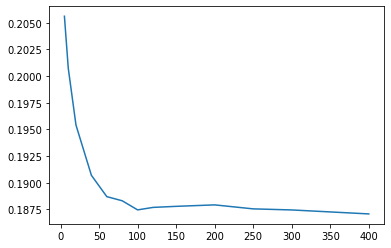

In [77]:
from matplotlib import pyplot as plt
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],be)

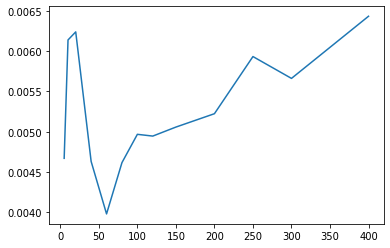

In [74]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],ve)

In [100]:
be1=pd.DataFrame(be)/pd.DataFrame(be).sum()
ve1=pd.DataFrame(ve)/pd.DataFrame(ve).sum()

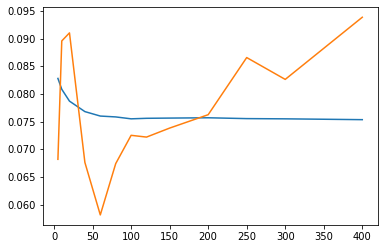

In [101]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],be1)
plt.plot([5,10,20,40,60,80,100,120,150,200,250,300,400],ve1)

In [88]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[20,40,60,80,100,120,140,160],
        #'max_features':['auto','sqrt','log2'],
        #'criterion':['gini','entropy'],
        'max_depth':[10,15,20,25,30,40]}

In [89]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1')

In [90]:
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [92]:
tun_mod.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [93]:
tun_mod.best_score_

0.8171460646397776

In [113]:
res=pd.DataFrame(tun_mod.cv_results_)
res.shape

(48, 15)

In [115]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.227407,0.019231,0.018388,0.004327,10,20,"{'max_depth': 10, 'n_estimators': 20}",0.786684,0.796248,0.787576,0.798855,0.795902,0.793053,0.004951,46
1,0.458723,0.018214,0.035135,0.001523,10,40,"{'max_depth': 10, 'n_estimators': 40}",0.785543,0.794499,0.791981,0.800930,0.800000,0.794591,0.005623,43
2,0.632625,0.006444,0.051478,0.003396,10,60,"{'max_depth': 10, 'n_estimators': 60}",0.784664,0.793220,0.789446,0.800104,0.797162,0.792919,0.005476,47
3,0.842669,0.021775,0.060698,0.001703,10,80,"{'max_depth': 10, 'n_estimators': 80}",0.786038,0.795131,0.790916,0.803952,0.798837,0.794975,0.006195,42
4,1.051601,0.016299,0.074176,0.005177,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.786981,0.793933,0.790175,0.800519,0.796199,0.793561,0.004696,45
5,1.273510,0.046924,0.091933,0.009932,10,120,"{'max_depth': 10, 'n_estimators': 120}",0.783511,0.790407,0.786517,0.801666,0.799684,0.792357,0.007162,48
6,1.446185,0.004035,0.100919,0.003451,10,140,"{'max_depth': 10, 'n_estimators': 140}",0.784958,0.796451,0.789570,0.800625,0.800842,0.794489,0.006275,44
7,1.700092,0.052019,0.113315,0.004626,10,160,"{'max_depth': 10, 'n_estimators': 160}",0.786356,0.796863,0.792374,0.800832,0.800105,0.795306,0.005379,41
8,0.284467,0.030687,0.023866,0.004616,15,20,"{'max_depth': 15, 'n_estimators': 20}",0.803590,0.806610,0.805242,0.808102,0.813935,0.807496,0.003548,21
9,0.551234,0.035777,0.041776,0.003470,15,40,"{'max_depth': 15, 'n_estimators': 40}",0.800846,0.807210,0.805650,0.812598,0.811458,0.807552,0.004229,20


In [108]:
final_mod=RandomForestClassifier(**tun_mod.best_params_)

In [104]:
final_mod.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [107]:
print(classification_report(ytest,ypred1))
#Has imporved further now.

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      6016
         1.0       0.85      0.80      0.82      4184

    accuracy                           0.86     10200
   macro avg       0.86      0.85      0.85     10200
weighted avg       0.86      0.86      0.86     10200



In [109]:
score = cross_val_score(final_mod, inp_bal, out_bal, cv=kf, scoring='f1')
print(np.mean(score),np.std(score)/np.mean(score))

0.8233392206371681 0.007118398771231839
